  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:02<00:00,  1.19s/it]


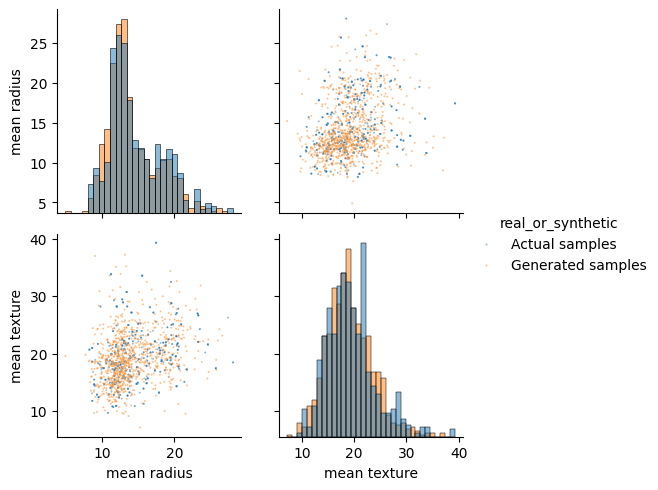

In [3]:
import torch
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from tabpfn_extensions import TabPFNClassifier, unsupervised
import matplotlib.pyplot as plt
plt.style.use("default")

# Load the breast cancer dataset
df = load_breast_cancer(return_X_y=False)
X, y = df["data"], df["target"]
attribute_names = df["feature_names"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.5,
    random_state=42,
)

# Initialize TabPFN models
# Use parameters that work with both TabPFN and TabPFN-client
clf = TabPFNClassifier(n_estimators=3)

# Import TabPFNRegressor for numerical features
from tabpfn_extensions import TabPFNRegressor

reg = TabPFNRegressor(n_estimators=3)

# Initialize unsupervised model
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=clf,
    tabpfn_reg=reg,
)

# Select features for analysis (e.g., first two features)
feature_indices = [0, 1]

# Create and run synthetic experiment
exp_synthetic = unsupervised.experiments.GenerateSyntheticDataExperiment(
    task_type="unsupervised",
)

# Convert data to torch tensors
X_tensor = torch.tensor(X_train, dtype=torch.float32)
y_tensor = torch.tensor(y_train, dtype=torch.float32)

# Run the experiment
results = exp_synthetic.run(
    tabpfn=model_unsupervised,
    X=X_tensor,
    y=y_tensor,
    attribute_names=attribute_names,
    temp=1.0,
    n_samples=X_train.shape[0] * 3,  # Generate 3x original samples
    indices=feature_indices,
)